In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import warnings
import json

data_file_formats = [
    ("data/960_seed0_Bo120_qweninst_mistral/", "qwen_instruct_RM-Mistral-7B_prompt_"),
    ("data/Bo120_Llama-3.1-8B-Instruct_RM-Mistral-7B/", "Llama-3.1-8B-Instruct_RM-Mistral-7B_prompt_"),
    ("data/Bo120_Llama-3.2-3B-Instruct_RM-Mistral-7B/", "Llama-3.2-3B-Instruct_RM-Mistral-7B_prompt_"),
    ("data/Bo120_Ministral-8B-Instruct-2410_RM-Mistral-7B/", "Ministral-8B-Instruct-2410_RM-Mistral-7B_prompt_"),
]

generator_id = 0

In [2]:
data = []
prompt_size = 100
for item in data_file_formats:
    all_x = []
    prefix = item[0] + item[1]
    for i in range(prompt_size):
        index = i
        trajectories = []
        try:
            file_name = prefix + str(index).zfill(4) + ".json"

            import json
            with open(file_name, "r") as f:
                row = json.load(f)
                
                for x in row:
                    trajectories.extend(x["trajectories"])
    #             prompt_data.append(trajectories)
        except:
            pass
        
        x = [y["score"] for y in trajectories]
        all_x.append(x)

    df_real = pd.DataFrame(all_x)
    df_real.shape
    data.append(df_real)

In [3]:
costs = [0.05, 0.04, 0.03, 0.02, 0.010, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001, 0.0009, 0.0008, 0.0007, 0.0006, 0.0005, 0.0004, 0.0003, 0.0002, 0.0001, 0.00009, 0.00008, 0.00007, 0.00006, 0.00005, 0.00004, 0.00003, 0.00002, 0.00001]

In [27]:
df = data[generator_id]

results = {}
for c in costs:
    with open(f"res_{c}.json", "r") as f:
        res = json.load(f)

    scores_adaptive = [item["max_until"]["value"] for item in res]
    win_rates_adaptive = [item["win_rate"] for item in res]
    gen_counts = [item["open_count"][0] for item in res]
    avg_gen_count = int(np.mean(gen_counts))
    win_rates_non_adaptive = []
    scores_non_adaptive = []

    for i in range(100):
        d = np.array(df.iloc[i])
        m = np.max(d)
        v = np.max(d[:avg_gen_count])
        win_rates_non_adaptive.append(float(np.exp(v)/(np.exp(v) + np.exp(m))))
        scores_non_adaptive.append(float(v))

    scores_adaptive = np.array(scores_adaptive)
    scores_non_adaptive = np.array(scores_non_adaptive)
    win_rates_vs = np.exp(scores_adaptive)/(np.exp(scores_adaptive) + np.exp(scores_non_adaptive))

    results[c] = {
        "avg_gen_count":avg_gen_count,
        "avg_win_rate_comparison": np.mean(win_rates_vs),
        "mean_adaptive_avg_win_rate_against_global_max": np.mean(win_rates_adaptive),
        "mean_non_adaptive_avg_win_rate_against_global_max": np.mean(win_rates_non_adaptive),
        "median_adaptive_avg_win_rate_against_global_max": np.median(win_rates_adaptive),
        "median_non_adaptive_avg_win_rate_against_global_max": np.median(win_rates_non_adaptive)
    }

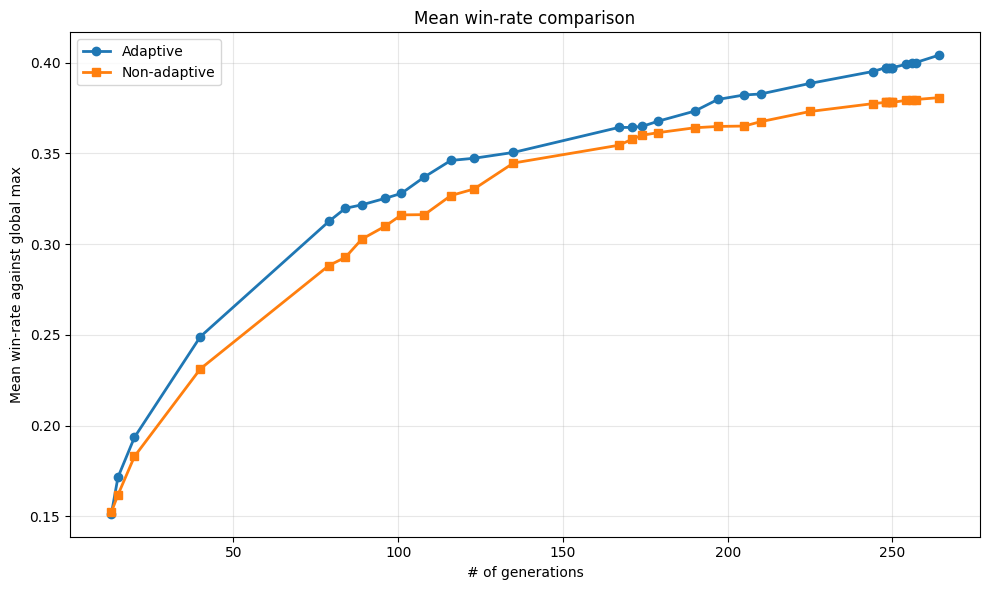

In [30]:
# Your data arrays
x1s = [results[c]["avg_gen_count"] for c in costs] # Replace with your x coordinates for line 1
y1s = [results[c]["mean_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 1

x2s = [results[c]["avg_gen_count"] for c in costs]  # Replace with your x coordinates for line 2
y2s = [results[c]["mean_non_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 2

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(x1s, y1s, marker='o', label='Adaptive', linewidth=2)
plt.plot(x2s, y2s, marker='s', label='Non-adaptive', linewidth=2)

# Add labels and title
plt.xlabel('# of generations')
plt.ylabel('Mean win-rate against global max')
plt.title('Mean win-rate comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

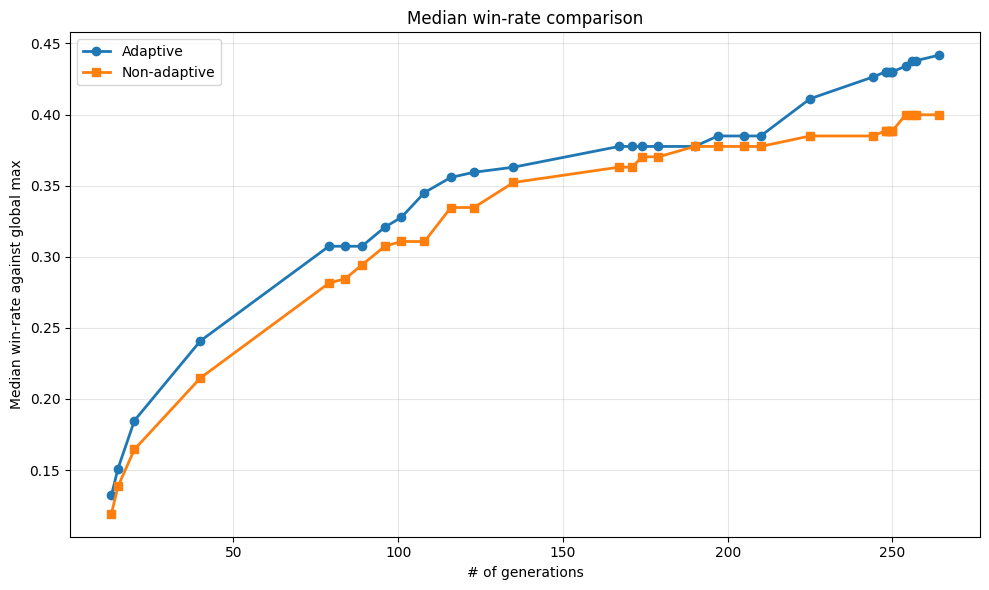

In [31]:
# Your data arrays
x1s = [results[c]["avg_gen_count"] for c in costs] # Replace with your x coordinates for line 1
y1s = [results[c]["median_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 1

x2s = [results[c]["avg_gen_count"] for c in costs]  # Replace with your x coordinates for line 2
y2s = [results[c]["median_non_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 2

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(x1s, y1s, marker='o', label='Adaptive', linewidth=2)
plt.plot(x2s, y2s, marker='s', label='Non-adaptive', linewidth=2)

# Add labels and title
plt.xlabel('# of generations')
plt.ylabel('Median win-rate against global max')
plt.title('Median win-rate comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

In [46]:
df_real = data[generator_id]
da = np.exp(np.array(df_real))
dm = np.max(da, axis=1)
wrs = []
for i in range(350):
    dv = np.max(da[:, :i+1], axis=1)
    wr = np.mean(dv/(dv+dm))
    
    wrs.append(wr)

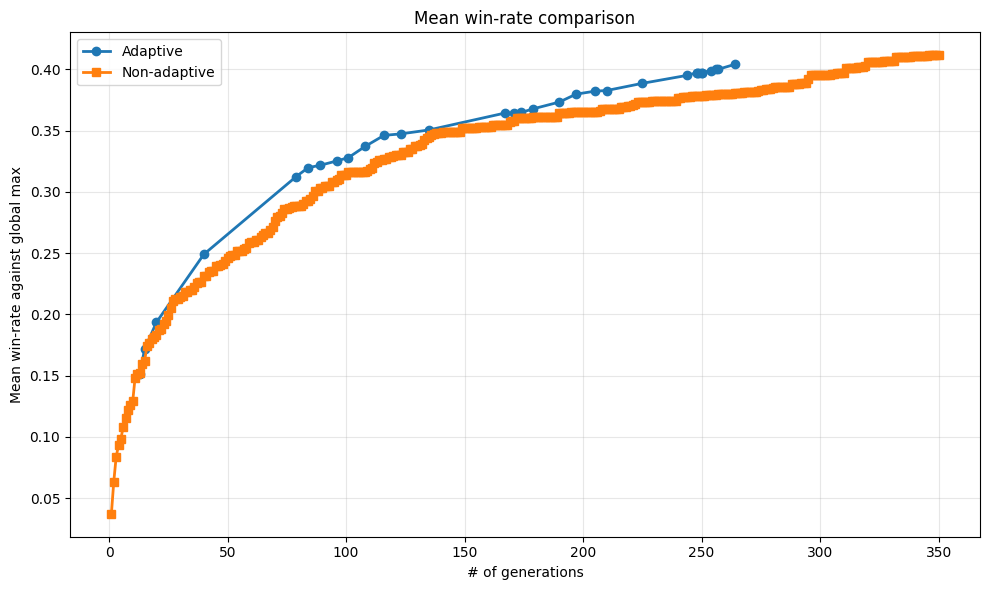

In [48]:
# Your data arrays
x1s = [results[c]["avg_gen_count"] for c in costs] # Replace with your x coordinates for line 1
y1s = [results[c]["mean_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 1

x2s = list(range(1, 351))  # Replace with your x coordinates for line 2
y2s = wrs# [results[c]["mean_non_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 2

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(x1s, y1s, marker='o', label='Adaptive', linewidth=2)
plt.plot(x2s, y2s, marker='s', label='Non-adaptive', linewidth=2)

# Add labels and title
plt.xlabel('# of generations')
plt.ylabel('Mean win-rate against global max')
plt.title('Mean win-rate comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

0.23937826485002867


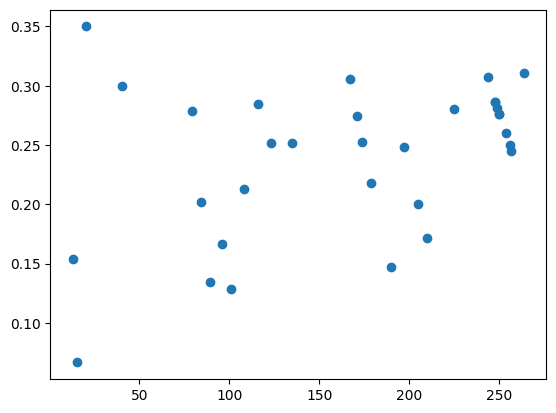

In [56]:
excess_sample_ratio = []
for i in range(len(x1s)):
    # print(x1s[i], y1s[i])
    for j in range(350):
        if y2s[j] > y1s[i]:
            # print(x1s[i], y1s[i], x2s[j], y2s[j])
            excess_sample_ratio.append((x2s[j]-x1s[i])/x1s[i])
            break
print(np.mean(excess_sample_ratio))
plt.scatter(x1s, excess_sample_ratio)

In [49]:
df_real = data[generator_id]
da = np.exp(np.array(df_real))
dm = np.max(da, axis=1)
wrrs = []
for i in range(350):
    dv = np.max(da[:, :i+1], axis=1)
    wrr = np.median(dv/(dv+dm))
    
    wrrs.append(wrr)

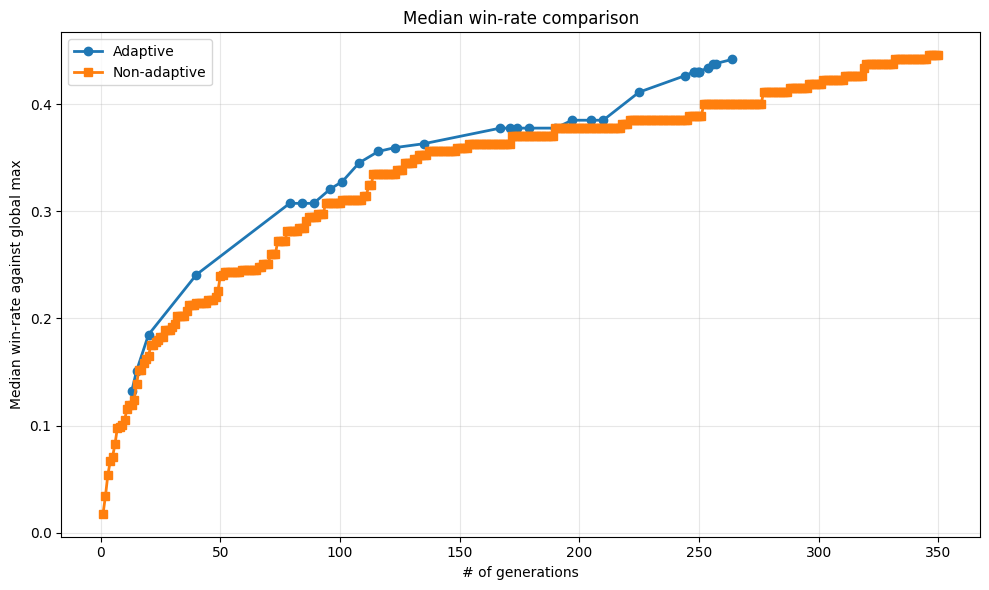

In [50]:
# Your data arrays
x1s = [results[c]["avg_gen_count"] for c in costs] # Replace with your x coordinates for line 1
y1s = [results[c]["median_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 1

x2s = list(range(1, 351)) #[results[c]["avg_gen_count"] for c in costs]  # Replace with your x coordinates for line 2
y2s = wrrs #[results[c]["median_non_adaptive_avg_win_rate_against_global_max"] for c in costs]  # Replace with your y coordinates for line 2

# Create the plot
plt.figure(figsize=(10, 6))

# Plot both lines
plt.plot(x1s, y1s, marker='o', label='Adaptive', linewidth=2)
plt.plot(x2s, y2s, marker='s', label='Non-adaptive', linewidth=2)

# Add labels and title
plt.xlabel('# of generations')
plt.ylabel('Median win-rate against global max')
plt.title('Median win-rate comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

0.2731249484542676


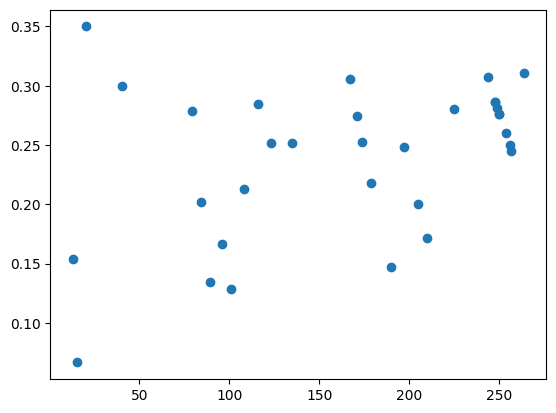

In [60]:
excess_sample_ratio = []
for i in range(len(x1s)):
    # print(x1s[i], y1s[i])
    for j in range(350):
        if y2s[j] > y1s[i]:
            # print(x1s[i], y1s[i], x2s[j], y2s[j])
            excess_sample_ratio.append((x2s[j]-x1s[i])/x1s[i])
            break
print(np.mean(excess_sample_ratio[(3*len(excess_sample_ratio))//4:]))
plt.scatter(x1s, excess_sample_ratio)